<a href="https://colab.research.google.com/github/thiawsimplon/AppDev2021/blob/main/Reconnaissfaciale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install face_recognition #installation de la librairie


     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=c9da4df4db618b1f2c846cc27dd400179bf6161d4fb9d51760cf1a05745074d3
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr

In [ ]:
img= fr.load_image_file("/content/aliou.jpg")

In [ ]:
img_landmark=fr.face_landmarks(img)
img_landmark[0]

{'bottom_lip': [(279, 556),
  (258, 576),
  (236, 584),
  (221, 585),
  (209, 585),
  (192, 579),
  (178, 565),
  (185, 565),
  (208, 564),
  (220, 564),
  (234, 563),
  (270, 558)],
 'chin': [(136, 453),
  (134, 480),
  (135, 509),
  (141, 537),
  (150, 566),
  (165, 594),
  (183, 617),
  (204, 635),
  (232, 640),
  (264, 635),
  (296, 620),
  (326, 601),
  (350, 576),
  (365, 545),
  (371, 512),
  (374, 479),
  (374, 445)],
 'left_eye': [(158, 453),
  (168, 446),
  (181, 445),
  (196, 450),
  (182, 454),
  (168, 456)],
 'left_eyebrow': [(139, 427), (148, 415), (164, 411), (181, 412), (198, 417)],
 'nose_bridge': [(219, 441), (216, 457), (213, 474), (210, 492)],
 'nose_tip': [(193, 513), (204, 516), (216, 518), (230, 514), (243, 510)],
 'right_eye': [(257, 446),
  (271, 438),
  (286, 438),
  (300, 443),
  (287, 449),
  (272, 449)],
 'right_eyebrow': [(240, 413), (261, 405), (283, 402), (306, 406), (324, 417)],
 'top_lip': [(178, 565),
  (190, 553),
  (206, 547),
  (218, 549),
  (232, 

In [ ]:
import matplotlib.pyplot as plt
import cv2

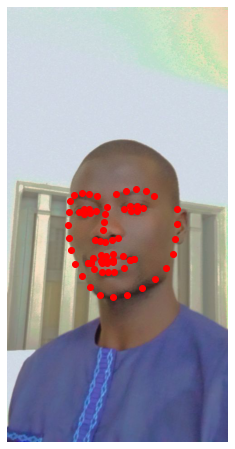

In [ ]:
plt.figure(figsize=(12,8))
plt.axis("off")
plt.imshow(img)
for keys in img_landmark[0]:
  for x,y in img_landmark[0][keys]:
    plt.scatter(x,y,c="r")

plt.show()

In [ ]:
import numpy as np


In [ ]:
aliou_img=fr.load_image_file("/content/aliou.jpg") #image de refernece

In [ ]:
aliou_face_encoding=fr.face_encodings(aliou_img)[0]

In [ ]:
known_face_encoding=[aliou_face_encoding]

In [ ]:
known_face_names=['Aliou']

In [ ]:
test_img=fr.load_image_file("/content/coly.jpg")
rgb_img=test_img[:,:,::-1]

face_locations=fr.face_locations(rgb_img)
print(face_locations)




[(180, 304, 366, 118)]


In [ ]:
face_encodings=fr.face_encodings(rgb_img,face_locations)

In [ ]:
for (top ,right ,bottom, left), face_encodings in zip(face_locations,face_encodings):
  matches=fr.compare_faces(known_face_encoding, face_encodings)

  face_distances=fr.face_distance(known_face_encoding,face_encodings)

  best_matches_index=np.argmin(face_distances)

  seuil=np.min(face_distances)

  if (matches[best_matches_index]) & (seuil < 0.40):
    name=known_face_names[best_matches_index]

    cv2.rectangle(test_img,(left,top),(right,bottom),(0,0,255),2)
    cv2.rectangle(test_img,(left,bottom-35),(right,bottom),(0,0,255),cv2.FILLED)
    font=cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(test_img,name,(left+6, bottom-6),font,1.0,(255,255,255),1)
  
  else:
    top=face_locations[0][0]
    right=face_locations[0][1]
    bottom=face_locations[0][2]
    left=face_locations[0][3]

    name="Inconnu"

    cv2.rectangle(test_img,(left,top),(right,bottom),(0,0,255),2)
    cv2.rectangle(test_img,(left,bottom-35),(right,bottom),(0,0,255),cv2.FILLED)
    font=cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(test_img,name,(left+6, bottom-6),font,1.0,(255,255,255),1)





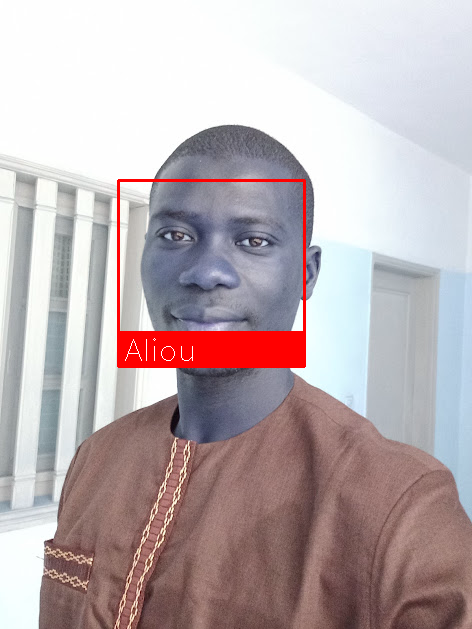

In [ ]:
from google.colab.patches import  cv2_imshow

cv2_imshow(test_img)